# О работе

Эта лабораторная работа направлена на изучение базовых алгоритмов без учителя и обработки текстовых данных с использыванием библиотеки scikit-learn.

Лабораторная состоит из следующих пуунктов:
1. Понижение размерности и визуализация данных.
2. Кластерный анализ
3. Обработка и классификация текстовых данных.

## Импорт необходимых для работы библиотек

In [1]:
# Установка пакета pandas
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Установка пакета numpy
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Установка пакета matplotlib
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# Установка пакета seaborn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
# Установка пакета scikit-learn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
# Установка пакета re
%pip install re

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
# Установка пакета string
%pip install string

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
# Установка пакета nltk
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
# Установка пакета wordcloud
%pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
# Установка пакета wordcloud
%pip install PIL

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
# Необходимые импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PCA and TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# K-Means
from PIL import Image

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

# WordCloud & Tfidf
import re
import string
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\schif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\schif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Подключение [датасета](https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability/) для PCA и TSNE

Замечание: так как датасет я искал не одним из первых среди студентов данного курса, то он вышел не совсем совершенным, из-за чего точность работы некоторых методов оставляет желать лучшего. 

### Считываем [датасет](https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability/)

In [14]:
# Загоняем датасет в переменную "data_df" 
data_df = pd.read_csv('../DATASET/DATASET.csv')

### Вывод основной информации о датасете

In [15]:
# Выводим первые несколько рядком для того, чтобы понять, правильно ли загружены данные
data_df.head()

ph  Hardness    Solids  Chloramines  Sulfate  Conductivity  \
0  0.00    204.89  20791.32         7.30   368.52        564.31   
1  3.72    129.42  18630.06         6.64     0.00        592.89   
2  8.10    224.24  19909.54         9.28     0.00        418.61   
3  8.32    214.37  22018.42         8.06   356.89        363.27   
4  9.09    181.10  17978.99         6.55   310.14        398.41   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0           10.38            86.99       2.96         0.0  
1           15.18            56.33       4.50         0.0  
2           16.87            66.42       3.06         0.0  
3           18.44           100.34       4.63         0.0  
4           11.56            32.00       4.08         0.0

In [16]:
# Выводим размер датасета
data_df.size

32760

In [17]:
# Выводим информацию о типе данных каждой отдельно взятой колонке и общую информацию о таблице
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   float64
dtypes: float64(10)
memory usage: 256.1 KB


In [18]:
# Выводим количество содержащих значение "null" ячеек для каждой колонки
data_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [19]:
# Выводим количество рядков в датасете до очищения таблицы от тех, в которых содержиться "null"
data_df.shape

(3276, 10)

In [20]:
# Найдём рядки со значением "#NUM!" и удалим их из набора данных
data_df = data_df[data_df != '#NUM!'].dropna()

In [21]:
# Выводим количество рядков в датасете после очищения таблицы от тех, в которых содержиться "null"
data_df.shape

(3276, 10)

### Разбиение данных

In [22]:
# Присваиваем переменной "X" таблицу, равную исходной
X = data_df
# Присваиваем переменной "y" таблицу, равную колонке 'Potability'
Y = data_df['Potability']

In [23]:
# Проверяем правильно ли выглядят тренировочные данные
X.head()


ph  Hardness    Solids  Chloramines  Sulfate  Conductivity  \
0  0.00    204.89  20791.32         7.30   368.52        564.31   
1  3.72    129.42  18630.06         6.64     0.00        592.89   
2  8.10    224.24  19909.54         9.28     0.00        418.61   
3  8.32    214.37  22018.42         8.06   356.89        363.27   
4  9.09    181.10  17978.99         6.55   310.14        398.41   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0           10.38            86.99       2.96         0.0  
1           15.18            56.33       4.50         0.0  
2           16.87            66.42       3.06         0.0  
3           18.44           100.34       4.63         0.0  
4           11.56            32.00       4.08         0.0

In [24]:
print("Количество рядков в тренировочных данных: \"" + str(X.shape[0]) + "\".")

Количество рядков в тренировочных данных: "3276".


In [25]:
# Проверяем правильно выглядят тренировочные данные
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Potability, dtype: float64

In [26]:
print("Количество рядков в тренировочных данных: \"" + str(Y.shape[0]) + "\".")

Количество рядков в тренировочных данных: "3276".


### Масштабирование данных

In [27]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

## Principal Component Analysis

In [28]:
pca = PCA()
X_pca = pca.fit_transform(scaled_X)

In [29]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

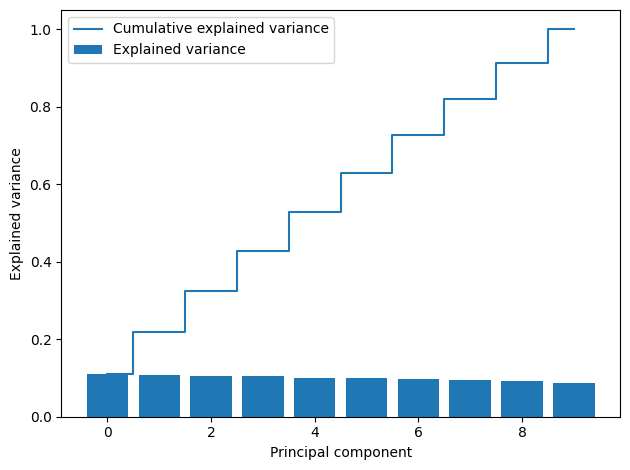

In [30]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

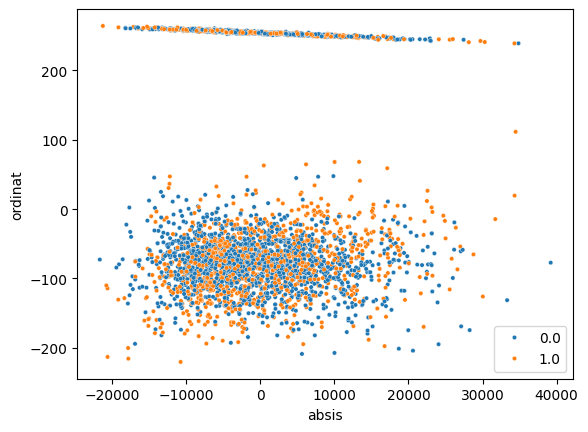

In [31]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_result_df = pd.DataFrame({'absis': pca_result[:,0], 'ordinat': pca_result[:,1], 'label': Y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='absis', y='ordinat', hue='label', data=pca_result_df, ax=ax,s=10)
ax.legend()

## T-distributed Stochastic Neighbor Embedding

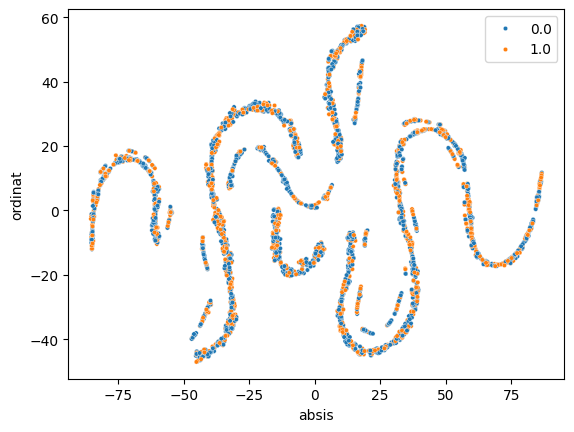

In [32]:
tsne = TSNE(n_components=2)
result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'absis': result[:,0], 'ordinat': result[:,1], 'label': Y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='absis', y='ordinat', hue='label', data=tsne_result_df, ax=ax,s=10)
ax.legend()

## K-means Clustering

In [33]:
def load_and_normalize_image(image_path):
    poster = plt.imread(image_path)
    return np.array(poster, dtype=np.float64) / 255

In [34]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

In [35]:
def process_image(image_array, n_clusters):
    w, h, d = image_array.shape
    image_array_flat = np.reshape(image_array, (w * h, d))

    image_array_sample = shuffle(image_array_flat, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=0).fit(image_array_sample)

    labels = kmeans.predict(image_array_flat)

    codebook_random = shuffle(image_array_flat, random_state=0, n_samples=n_clusters)
    labels_random = pairwise_distances_argmin(codebook_random, image_array_flat, axis=0)

    return w, h, labels, codebook_random, labels_random, kmeans.cluster_centers_

In [36]:
def plot_images(image, title, subplot_number):
    plt.figure(subplot_number)
    plt.clf()
    plt.axis("off")
    plt.title(title)
    plt.imshow(image)

На этом этапе проверим качество работы кластеризации при разных значениях параметров. Не вооружённым глазои видно, что случайная генерация значительно уступает предложенному типу кластерзации.


N = 64



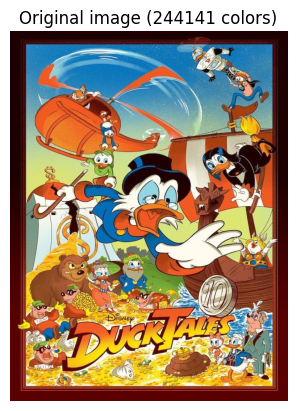

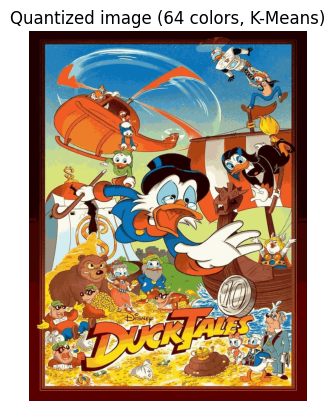

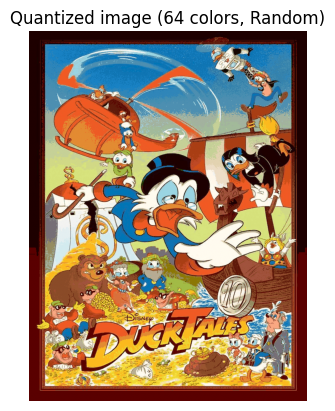


N = 32



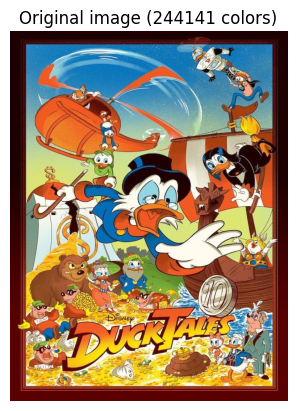

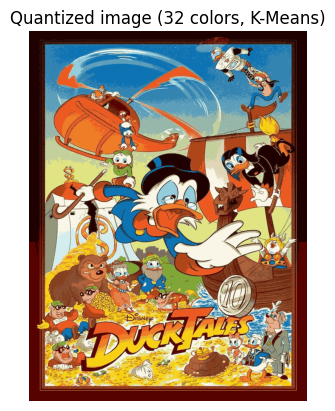

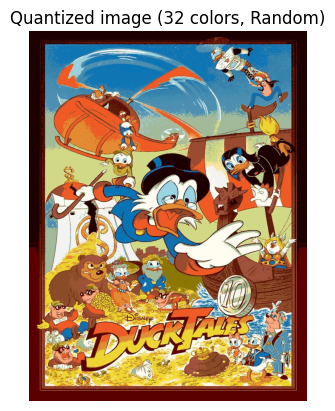


N = 16



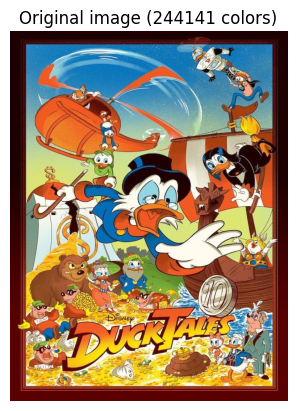

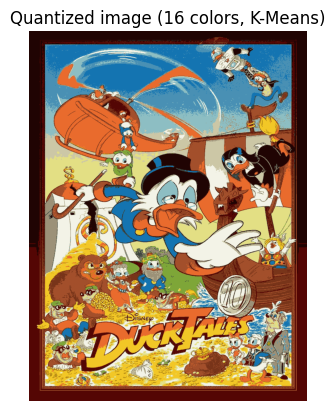

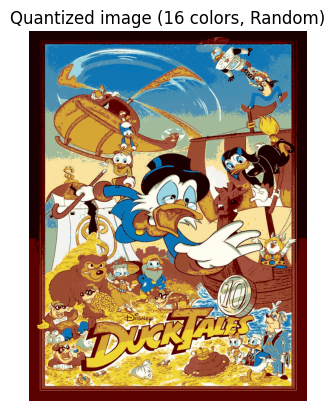


N = 8



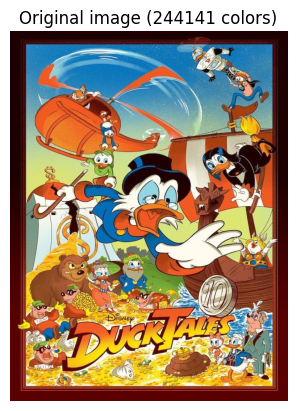

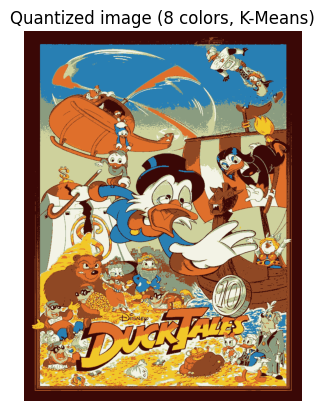

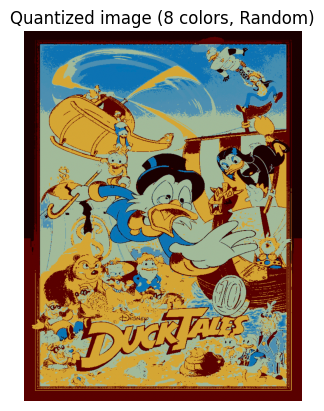

In [37]:
image_path = "../FILES/IMAGES/DUCK_TALES_POSTER.jpg"
original_image = load_and_normalize_image(image_path)

for i in [64, 32, 16, 8]:
    print(f"\nN = {i}\n")

    w, h, labels, codebook_random, labels_random, kmeans_centers = process_image(original_image, i)

    img = Image.open(image_path)
    unique_colors = set(img.getdata())
    length = len(unique_colors)

    plot_images(original_image, f"Original image ({length} colors)", 1)
    plot_images(recreate_image(kmeans_centers, labels, w, h), f"Quantized image ({i} colors, K-Means)", 2)
    plot_images(recreate_image(codebook_random, labels_random, w, h), f"Quantized image ({i} colors, Random)", 3)

    plt.show()

## Подключение [датасета](https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews) для Wordcloud и TFIDF

Замечание: так как датасет я искал не одним из первых среди студентов данного курса, то он вышел не совсем совершенным, из-за чего точность работы некоторых методов оставляет желать лучшего. 

### Считываем [датасет](https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews)

In [38]:
# Загоняем датасет в переменную "data_df" 
data_df = pd.read_csv('../DATASET/IMDB_DATASET.csv')

### Вывод основной информации о датасете

In [39]:
# Выводим первые несколько рядком для того, чтобы понять, правильно ли загружены данные
data_df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [40]:
# Выводим размер датасета
data_df.size

100000

In [41]:
# Выводим информацию о типе данных каждой отдельно взятой колонке и общую информацию о таблице
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [42]:
# Выводим количество содержащих значение "null" ячеек для каждой колонки
data_df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [43]:
# Выводим количество рядков в датасете до очищения таблицы от тех, в которых содержиться "null"
data_df.shape

(50000, 2)

In [44]:
data_df = data_df.dropna().reset_index(drop=True)

In [45]:
# Выводим количество рядков в датасете после очищения таблицы от тех, в которых содержиться "null"
data_df.shape

(50000, 2)

### Токенизация

In [46]:
Data = data_df[['review','sentiment']]
print(Data['review'][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [47]:
words = word_tokenize(Data['review'][0])
words

['One',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'Oz',
 'episode',
 'you',
 "'ll",
 'be',
 'hooked',
 '.',
 'They',
 'are',
 'right',
 ',',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'Oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 ',',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'GO',
 '.',
 'Trust',
 'me',
 ',',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 '.',
 'This',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 ',',
 'sex',
 'or',
 'violence',
 '.',
 'Its',
 'is',
 'hardcore',
 ',',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'It',
 'is',
 'called',
 'OZ',
 'as',


### Очистка от запрещённых слов

In [48]:
def clean_text(text): 
    text = str(text)
    text = text.lower()
    text = re.sub("\d", " ", text)
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    stop_words = stopwords.words("english")
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

In [49]:
Data['review'] = [clean_text(review) for review in Data['review']]
Data

review sentiment
0      one reviewers mentioned watching oz episode ho...  positive
1      wonderful little production br br filming tech...  positive
2      thought wonderful way spend time hot summer we...  positive
3      basically family little boy jake thinks zombie...  negative
4      petter mattei love time money visually stunnin...  positive
...                                                  ...       ...
49995  thought movie right good job creative original...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  catholic taught parochial elementary schools n...  negative
49998  going disagree previous comment side maltin on...  negative
49999  one expects star trek movies high art fans exp...  negative

[50000 rows x 2 columns]

## Визуализация с помощью Wordcloud

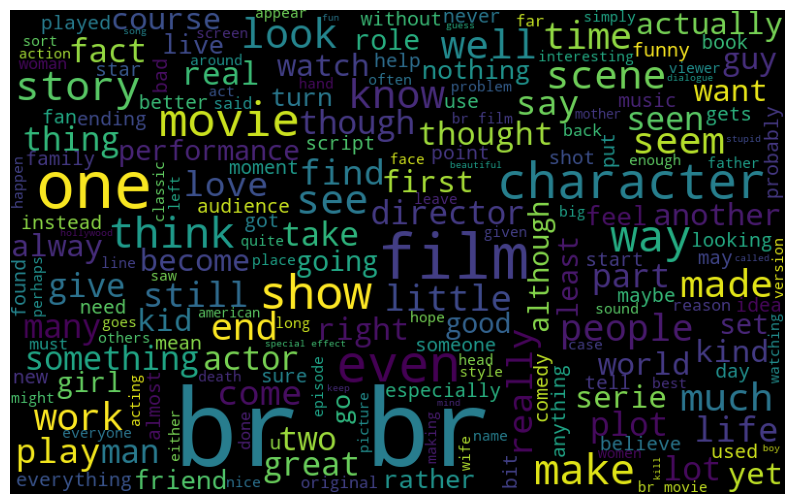

In [50]:
words = ' '.join([text for text in Data['review']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud) 
plt.axis('off')
plt.show()

## Векторизация с помощью TFIDF

In [51]:
X_train, X_test, y_train, y_test = train_test_split(Data['review'], Data['sentiment'], test_size=0.30)
tfidf_vectorizer = TfidfVectorizer(max_df=1000, min_df=10)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test =  tfidf_vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=400).fit(tfidf_train, y_train)

predicted = clf.predict(tfidf_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

    negative       0.87      0.84      0.86      7544
    positive       0.84      0.88      0.86      7456

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

